#Importing Libraries


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from google.colab import drive
from matplotlib import pyplot as plt
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Loading the Dataset

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/pj/diabet/diabetes.csv")

#Exploring the Dataset

In [ ]:
print(df.describe())
df.info()
print(df.isnull().sum())
df.dropna(inplace=True)


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

# Preprocessing the Data

In [ ]:
required_features=['Pregnancies','Glucose',
                   'BloodPressure','SkinThickness',
                   'Insulin','BMI',
                   'DiabetesPedigreeFunction','Age']
output_label='Outcome'

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
df[required_features],
df[output_label],
test_size = 0.3)


#Creating the Model and creating types of models with Different parameters to find best score

In [ ]:
kernels=['linear', 'poly', 'rbf', 'sigmoid' ]
gammas = [0.1, 1, 10, 100]
for kernel in kernels:
    model = SVC(kernel=kernel)
    model.fit(x_train, y_train)
    print("model kernel='",kernel," score is :",(model.score(x_test,y_test))*100)


model kernel=' linear  score is : 75.75757575757575
model kernel=' poly  score is : 74.45887445887446
model kernel=' rbf  score is : 71.86147186147186
model kernel=' sigmoid  score is : 54.97835497835498


In [ ]:
kernels=[ 'rbf', 'sigmoid' ]
gammas = [0.1, 1, 10, 100]
for kernel in kernels:
  for gamma in gammas:

    model = SVC(kernel=kernel,gamma=gamma)
    model.fit(x_train, y_train)
    print("model kernel='",kernel,"gamma='",gamma,"' score is :",(model.score(x_test,y_test))*100)


model kernel=' rbf gamma=' 0.1 ' score is : 65.36796536796537
model kernel=' rbf gamma=' 1 ' score is : 65.36796536796537
model kernel=' rbf gamma=' 10 ' score is : 65.36796536796537
model kernel=' rbf gamma=' 100 ' score is : 65.36796536796537
model kernel=' sigmoid gamma=' 0.1 ' score is : 65.36796536796537
model kernel=' sigmoid gamma=' 1 ' score is : 65.36796536796537
model kernel=' sigmoid gamma=' 10 ' score is : 65.36796536796537
model kernel=' sigmoid gamma=' 100 ' score is : 65.36796536796537


In [ ]:
gammas = [0.1, 1, 10, 100]
kernels=[ 'rbf', 'sigmoid' ]
cs = [0.1, 1, 10, 100, 1000]
for c in cs:
  for kernel in kernels:
    model=SVC(kernel=kernel, C=c)
    model.fit(x_train, y_train)
    print("model kernel='",kernel,"gamma='",gamma,"' C : '",c,"' score is :",(model.score(x_test,y_test))*100)

model kernel=' rbf gamma=' 100 ' C : ' 0.1 ' score is : 66.66666666666666
model kernel=' sigmoid gamma=' 100 ' C : ' 0.1 ' score is : 65.36796536796537
model kernel=' rbf gamma=' 100 ' C : ' 1 ' score is : 71.86147186147186
model kernel=' sigmoid gamma=' 100 ' C : ' 1 ' score is : 54.97835497835498
model kernel=' rbf gamma=' 100 ' C : ' 10 ' score is : 71.42857142857143
model kernel=' sigmoid gamma=' 100 ' C : ' 10 ' score is : 45.02164502164502
model kernel=' rbf gamma=' 100 ' C : ' 100 ' score is : 74.02597402597402
model kernel=' sigmoid gamma=' 100 ' C : ' 100 ' score is : 44.58874458874459
model kernel=' rbf gamma=' 100 ' C : ' 1000 ' score is : 71.86147186147186
model kernel=' sigmoid gamma=' 100 ' C : ' 1000 ' score is : 44.58874458874459


In [ ]:
degrees = [0, 1, 2, 3, 4, 5, 6]
cs = [0.1, 1, 10, 100, 1000]
for degree in degrees:
  for c in cs :
   model=SVC(kernel='poly', C=c,degree=degree)
   model.fit(x_train, y_train)
   print("model kernel='","poly","' C : '",c,"' score is :",(model.score(x_test,y_test))*100)

model kernel=' poly ' C : ' 0.1 ' score is : 65.36796536796537
model kernel=' poly ' C : ' 1 ' score is : 65.36796536796537
model kernel=' poly ' C : ' 10 ' score is : 65.36796536796537
model kernel=' poly ' C : ' 100 ' score is : 65.36796536796537
model kernel=' poly ' C : ' 1000 ' score is : 65.36796536796537
model kernel=' poly ' C : ' 0.1 ' score is : 66.23376623376623
model kernel=' poly ' C : ' 1 ' score is : 73.59307359307358
model kernel=' poly ' C : ' 10 ' score is : 74.45887445887446
model kernel=' poly ' C : ' 100 ' score is : 75.75757575757575
model kernel=' poly ' C : ' 1000 ' score is : 76.19047619047619
model kernel=' poly ' C : ' 0.1 ' score is : 74.45887445887446
model kernel=' poly ' C : ' 1 ' score is : 73.16017316017316
model kernel=' poly ' C : ' 10 ' score is : 73.59307359307358
model kernel=' poly ' C : ' 100 ' score is : 73.59307359307358
model kernel=' poly ' C : ' 1000 ' score is : 74.89177489177489
model kernel=' poly ' C : ' 0.1 ' score is : 74.4588744588744

In [ ]:
model=SVC()
model.fit(x_train,y_train)
print("simpel SVC model score :",(model.score(x_test,y_test))*100)

In [ ]:
required_features=['Pregnancies','Glucose',
                   'BloodPressure','SkinThickness',
                   'Insulin','BMI',
                   'DiabetesPedigreeFunction','Age']
output_label='Outcome'

for i in required_features:
  x_train, x_test, y_train, y_test = train_test_split(
  df[f'{i}'].array.reshape(-1, 1),
  df[output_label],
  test_size = 0.3)
  model=SVC()
  model.fit(x_train,y_train)
  score=model.score(x_test,y_test)
  print("features: ",i," model score :",score*100)
  print("___________________________________")

features:  Pregnancies  model score : 61.471861471861466
___________________________________
features:  Glucose  model score : 76.19047619047619
___________________________________
features:  BloodPressure  model score : 61.471861471861466
___________________________________
features:  SkinThickness  model score : 64.5021645021645
___________________________________
features:  Insulin  model score : 67.09956709956711
___________________________________
features:  BMI  model score : 67.09956709956711
___________________________________
features:  DiabetesPedigreeFunction  model score : 71.42857142857143
___________________________________
features:  Age  model score : 70.12987012987013
___________________________________


# findig the most effective component

768


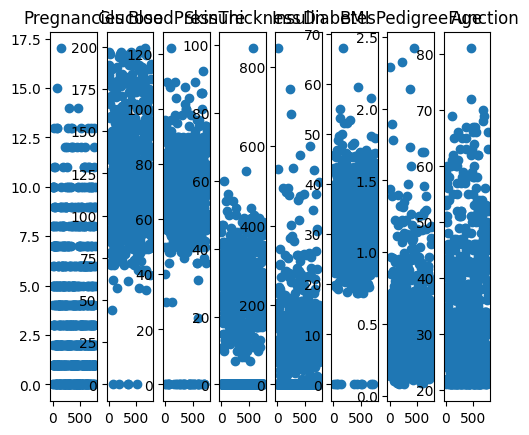

In [ ]:
required_features=['Pregnancies','Glucose',
                   'BloodPressure','SkinThickness',
                   'Insulin','BMI',
                   'DiabetesPedigreeFunction','Age']
n = len(required_features)
print(df[required_features[1]].shape[0])
for i in range(n):
    plt.subplot(1, n + 1, i + 1)
    plt.scatter(np.arange(df[required_features[i]].shape[0]), df[required_features[i]].values)
    plt.title(required_features[i])

plt.show()